# AH2179 Applied Artificial Intelligence in Transportation Group 5 Project
### By Fabian Fermazin, William Öman, Itsuki Shindo

In [39]:
#pip install calmap

In [40]:
import pandas as pd
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import calmap
import matplotlib.pyplot as plt
from datetime import datetime

#Data Preparation

In [41]:
df = pd.read_csv('Dataset-PT_seasons.csv')
Stockholmtemp2022 = pd.read_csv('Stockholmtemp2022.csv', sep=';')

In [42]:
# Change the date format of Stockholmtemp2022 to match the df
def change_date_format(date_str):
    date_obj = pd.to_datetime(date_str)
    return date_obj.strftime("%Y%m%d")
Stockholmtemp2022["date"] = Stockholmtemp2022["date"].apply(change_date_format)

# Change the name of the date column to match the df
Stockholmtemp2022["Calendar_date"] = 0
Stockholmtemp2022["Calendar_date"] = Stockholmtemp2022["date"]
Stockholmtemp2022.drop(columns=["date"])

,temp,Calendar_date
0,-1.4,20220101
1,1.9,20220102
2,3.6,20220103
3,0.6,20220104
4,-2.2,20220105
...,...,...
176,23.1,20220626
177,24.1,20220627
178,24.1,20220628
179,19.6,20220629


In [43]:
# Merge df and Stockholmtemp2022
Stockholmtemp2022["Calendar_date"] = Stockholmtemp2022["Calendar_date"].astype(int)
df = pd.merge(df, Stockholmtemp2022, on='Calendar_date')
df = df.drop(columns=['date'])
df["Calendar_date"] = pd.to_datetime(df['Calendar_date'], format='%Y%m%d')

# Data Exploration

In [44]:
days = np.unique(df[['Calendar_date']].values.ravel())

Calendar_date
2022-05-20    3969
2022-04-06    3969
2022-02-17    3969
2022-05-16    3969
2022-01-18    3969
              ... 
2022-05-30     108
2022-05-31      81
2022-06-01      81
2022-06-02      81
2022-06-03      81
Length: 173, dtype: int64

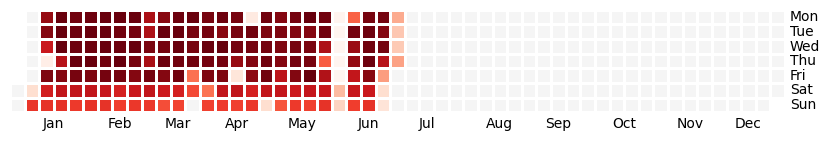

In [45]:
#higher frequency = more buses (or data measurements) that day
df['Calendar_date'] = pd.to_datetime(df['Calendar_date'])
date_freq = df.value_counts('Calendar_date')
plt.figure(figsize=(10,5))
calmap.yearplot(date_freq, year = 2022)
date_freq

In [46]:
snow_by_day = df.groupby(df['Calendar_date'].dt.date)['factor(weather)Snow'].sum() > 0
days_with_snow = snow_by_day[snow_by_day].index
print("Days with snow:")
for day in days_with_snow:
    print(day)

Days with snow:
2022-02-08
2022-02-19
2022-02-21
2022-03-29
2022-04-01
2022-04-05
2022-04-07
2022-04-08
2022-04-09


In [47]:
lightsnow_by_day = df.groupby(df['Calendar_date'].dt.date)['factor(weather)Light_Snow'].sum() > 0
days_with_lightsnow = lightsnow_by_day[lightsnow_by_day].index
print("Days with light snow:")
for day in days_with_lightsnow:
    print(day)

Days with light snow:
2022-01-08
2022-01-17
2022-01-29
2022-01-30
2022-02-01
2022-02-02
2022-02-08
2022-02-17
2022-02-19
2022-02-21
2022-02-23
2022-03-31
2022-04-01
2022-04-04
2022-04-07
2022-04-08
2022-04-09


In [48]:
rain_by_day = df.groupby(df['Calendar_date'].dt.date)['factor(weather)Rain'].sum() > 0
days_with_rain = rain_by_day[rain_by_day].index
print("Days with rain:")
for day in days_with_rain:
    print(day)

Days with rain:
2022-01-29
2022-02-16
2022-04-07
2022-05-07
2022-05-11
2022-05-14
2022-05-20
2022-05-27
2022-05-28


In [49]:
extracold_by_day = df.groupby(df['Calendar_date'].dt.date)['factor(temperature)Extra_cold'].sum() > 0
days_with_extracold = extracold_by_day[extracold_by_day].index
print("Extra cold days:")
for day in days_with_extracold:
    print(day)


Extra cold days:
2022-01-22
2022-01-25
2022-02-01
2022-02-02
2022-02-22
2022-02-23
2022-03-04
2022-03-05
2022-03-09
2022-03-12
2022-03-13
2022-03-14
2022-03-16
2022-03-29
2022-03-31
2022-04-01
2022-04-02


In [50]:
#We will remove this trip as an outlier since it is one hour early
df_new = df[(df['Calendar_date'] != '2022-06-30') | (df['bus_id']!=41361)]
#df_new.to_csv('clean_dataPT.csv')

In [51]:
#assign a trip id per trip, since bus id repeats itself within a day sometimes
df_new['trip_id'] = df_new.index // 27 + 1
df_new['trip_id']

<ipython-input-51-6b86ea210639>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['trip_id'] = df_new.index // 27 + 1


0             1
1             1
2             1
3             1
4             1
          ...  
545098    20189
545099    20189
545100    20189
545101    20189
545102    20189
Name: trip_id, Length: 545076, dtype: int64

In [52]:
#check if the above worked how we want it
df_new.groupby(['Calendar_date','bus_id','stop_sequence','trip_id'])['dwell_time'].count().sort_values()

Calendar_date  bus_id  stop_sequence  trip_id
2022-01-08     41344   1              1          1
2022-04-26     45533   1              13352      1
               45532   27             13470      1
                                      13452      1
                                      13429      1
                                                ..
2022-03-02     41727   21             6714       1
                                      6697       1
                                      6676       1
                       22             6783       1
2022-06-30     45722   27             20149      1
Name: dwell_time, Length: 545076, dtype: int64

In [53]:
#remove irrelevant columns. temperature related columns deemed irrelavant because we imported numeric temp data
df_new = df_new.drop(['route_id','temperature','factor(temperature)Cold','factor(temperature)Extra_cold','factor(temperature)Normal'], axis = 1)

In [54]:
df_new

,Calendar_date,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,previous_bus_delay,...,factor(weather)Rain,factor(weather)Snow,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak,Season,temp,trip_id
0,2022-01-08,41344,1,151,0,0,120,100,100,160,...,0,0,0,1,0,0,1,Winter,-0.5,1
1,2022-01-08,41344,2,185,24,171,45,151,100,198,...,0,0,0,1,0,0,1,Winter,-0.5,1
2,2022-01-08,41344,3,186,0,55,41,185,100,189,...,0,0,0,1,0,0,1,Winter,-0.5,1
3,2022-01-08,41344,4,202,12,42,94,186,100,200,...,0,0,0,1,0,0,1,Winter,-0.5,1
4,2022-01-08,41344,5,242,21,98,86,202,100,256,...,0,0,0,1,0,0,1,Winter,-0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545098,2022-06-30,41362,23,344,13,74,44,341,12,47,...,0,0,1,0,0,0,1,Summer,22.4,20189
545099,2022-06-30,41362,24,330,15,34,92,344,12,68,...,0,0,1,0,0,0,1,Summer,22.4,20189
545100,2022-06-30,41362,25,339,17,63,43,330,12,69,...,0,0,1,0,0,0,1,Summer,22.4,20189
545101,2022-06-30,41362,26,331,0,35,58,339,12,79,...,0,0,1,0,0,0,1,Summer,22.4,20189


In [55]:
#df_new.to_csv('clean_dataPT2.csv')

#Clustering

In [86]:
data = pd.read_csv('clean_dataPT2.csv')

In [87]:
df_test = data.groupby(['trip_id'])[['arrival_delay', 'dwell_time', 'traffic_condition', 'recurrent_delay', 'origin_delay', 'previous_bus_delay', 'factor(day_of_week)weekday', 'factor(time_of_day)Off-peak', 'temp','scheduled_travel_time']].mean()


In [88]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

In [89]:
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [90]:
scaling=StandardScaler()

# Use fit and transform method
scaling.fit(df_test)
Scaled_data=scaling.transform(df_test)

# Set the n_components=3
principal=PCA(n_components=2)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

# Check the dimensions of data after PCA
print(x.shape)

(20188, 2)


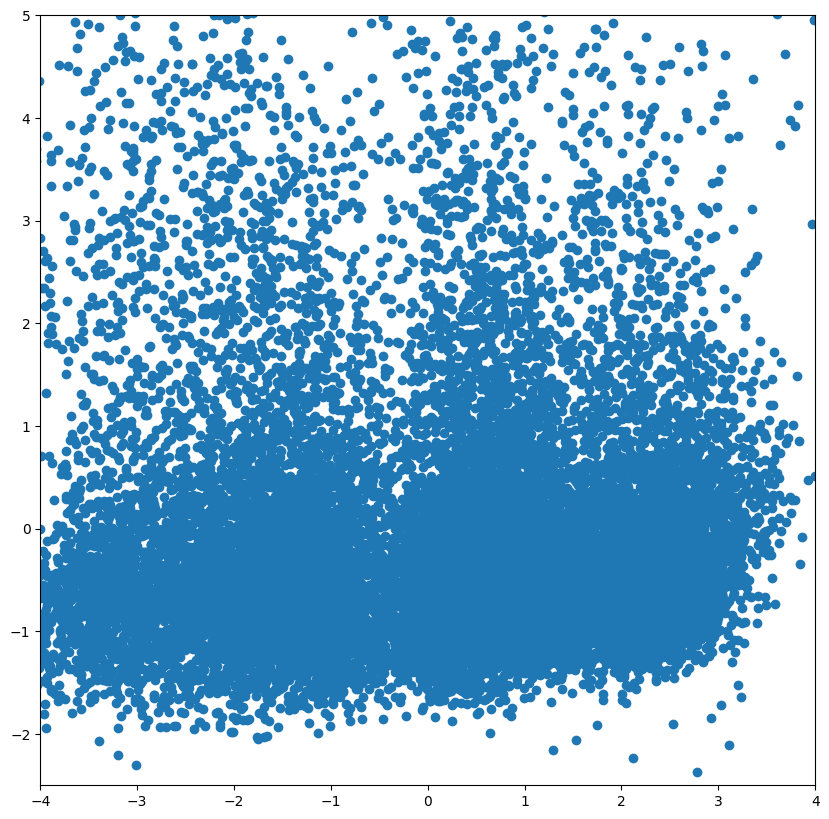

In [91]:
plt.figure(figsize=(10,10))
plt.xlim(-4,4)
plt.ylim(-2.5,5)
plt.scatter(x[:,0],x[:,1])

In [92]:
"""n_clusters = 2
clusters = AgglomerativeClustering(n_clusters=n_clusters,metric='euclidean', linkage='ward').fit(data)

cluster_labels = GaussianMixture(n_components=n_clusters).fit(df_new).predict(data)"""

"n_clusters = 2\nclusters = AgglomerativeClustering(n_clusters=n_clusters,metric='euclidean', linkage='ward').fit(data)\n\ncluster_labels = GaussianMixture(n_components=n_clusters).fit(df_new).predict(data)"

In [93]:
# BELOW lines enables you to comment in and out clustering method you want to use note that GMM have different ouput and thus labels are extracted differently
#clusters = KMeans(n_clusters=5, random_state=0, n_init="auto")# check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#clusters.fit(x)
clusters = AgglomerativeClustering(n_clusters=n_clusters,metric='euclidean', linkage='ward').fit(x) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
#clusters = DBSCAN(eps=500, min_samples = 2).fit(vectorized_day_dataset_no_nans) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

if clusters is not None:
 cluster_labels = clusters.labels_

cluster_labels = GaussianMixture(n_components=n_clusters).fit(x).predict(x) #check the parameters at  https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_init.html#sphx-glr-auto-examples-mixture-plot-gmm-init-py


print(cluster_labels)

[0 0 0 ... 0 0 0]


#Evaluation

In [94]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

In [95]:
# Import relevant metrics from scikit-learn
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

# Calculate the Silhouette Score
SC_score = silhouette_score(x, cluster_labels)
# Silhouette Score measures the quality of clusters, higher values indicate better separation.

# Calculate the Davies-Bouldin Score
DB_score = davies_bouldin_score(x, cluster_labels)
# Davies-Bouldin Score measures the average similarity between each cluster and its most similar cluster, lower values indicate better separation.

# Calculate the Calinski-Harabasz Score
CH_score = calinski_harabasz_score(x, cluster_labels)
# Calinski-Harabasz Score measures the ratio of between-cluster variance to within-cluster variance, higher values indicate better separation.

# Print the computed cluster quality scores
print('Silhouette Score:', SC_score)
print('Davies-Bouldin Score:', DB_score)
print('Calinski-Harabasz Score:', CH_score)

Silhouette Score: 0.3585879850121437
Davies-Bouldin Score: 1.3973742877292366
Calinski-Harabasz Score: 5295.251016972726
